# Bollinger Band - Version(1)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta


def bollinger_band_version_1(close_prices , filename):
    number_of_days = len(close_prices.index)

    file = open(filename , "x")

    keys = list(range(1 , number_of_days + 1))
    source = '2022-06-01'
    source = datetime.strptime(source , '%Y-%m-%d')
    df1 = pd.DataFrame({'price' : close_prices , 'index' : keys})

    file.write(f'bollinger_band_version_1 Transaction logs of {filename} is here : \n')

    MEAN = []
    STD = []

    for i in range(1 , 31) :
      MEAN.append(np.mean(np.array(df1.iloc[ : i ]['price']) , axis = 0))
      STD.append(np.std(np.array(df1.iloc[ : i ]['price']),  axis = 0))

    for i in range(32 , number_of_days + 2 ):
      MEAN.append(np.mean(np.array(df1.iloc[i - 30 : i]['price']) , axis = 0 ))
      STD.append(np.std(np.array(df1.iloc[i - 30 : i]['price']) , axis = 0 ))

    df1['SMA'] = MEAN
    df1['STD'] = STD

    df1['UpperBound'] = df1['SMA'] + df1['STD']
    df1['LowerBound'] = df1['SMA'] - df1['STD']

    portfolio = 1000.00
    begining_value = portfolio
    position = ''

    plt.figure(figsize = (24 , 8))
    plt.plot(df1['SMA'] , color = 'seagreen')
    plt.plot(df1['UpperBound'] , color = 'red')
    plt.plot(df1['LowerBound'] , color = 'green')
    plt.plot(df1['price'] , color = 'black')

    plt.savefig(filename)


    for i in range(1 , number_of_days):
        price = df1.iloc[i]['price']
        lowerBound = df1.iloc[i]['LowerBound']
        upperBound = df1.iloc[i]['UpperBound']
        sma = df1.iloc[i]['SMA']


        if upperBound <= price and position != 'short':
          # print(f'Day open short position : {timedelta(days = i) + source}')
          # print(f'upperBound < price : {price}')

          file.write(f'Day open short position : {timedelta(days = i) + source} \n')
          file.write(f'upperBound < price : {price} \n')

          position = 'short'
          price1 = price
          number_of_positions = int(portfolio / price)


        elif price <= lowerBound and position != 'long' :
          # print(f'Day open long position : {timedelta(days = i) + source} \n')
          # print(f'price <= lowerBound : {price} \n')

          file.write(f'Day open long position : {timedelta(days = i) + source} \n')
          file.write(f'price <= lowerBound : {price} \n')


          position = 'long'
          price1 = price
          number_of_positions = int(portfolio / price)


        elif sma < price and position == 'long' :
          position = 'long-close'
          price2 = price
          # print(f'sma < price : {price} \n')
          # print(f'portfolio : {portfolio} \n')
          # print(f'profit : {number_of_positions * (price2 - price1)} \n')

          file.write(f'sma < price : {price} \n')
          file.write(f'portfolio : {portfolio} \n')
          file.write(f'profit : {number_of_positions * (price2 - price1)} \n')



          portfolio = portfolio + number_of_positions * (price2 - price1)

          # print(f'portfolio : {portfolio}')
          # print('----------------------')

          file.write(f'portfolio : {portfolio} \n')
          file.write('---------------------- \n')


        elif price < sma and position == 'short' :
          position = 'short-close'
          price2 = price
          # print(f'price < sma : {price}')
          # print(f'portfolio : {portfolio}')
          # print(f'profit : {number_of_positions * (price1 - price2)}')

          file.write(f'price < sma : {price} \n')
          file.write(f'portfolio : {portfolio} \n')
          file.write(f'profit : {number_of_positions * (price1 - price2)} \n')

          portfolio = portfolio + number_of_positions * (price1 - price2)

          # print(f'portfolio : {portfolio}')
          # print('----------------------')

          file.write(f'portfolio : {portfolio} \n')
          file.write('----------------------\n')


    # print(f'portfolio : {portfolio}')
    compound_return = (portfolio / begining_value) - 1
    profit = portfolio - begining_value
    percent_return = profit / begining_value

    risk_free = 0.04
    standard_deviation = np.std(np.array(df1.iloc[ : i ]['price']),  axis = 0)
    sharp_ratio = (percent_return - risk_free) / standard_deviation

    # print(f'compound_return : {compound_return}')
    # print(f'percent return  : {percent_return}')
    # print(f'sharp ratio     : {sharp_ratio}')

    file.write(f'portfolio : {portfolio} \n')
    file.write(f'compound_return : {compound_return} \n')
    file.write(f'percent return  : {percent_return} \n')
    file.write(f'sharp ratio     : {sharp_ratio} \n')

    file.close()

# Testing BollingerBand Version(1)

In [ ]:
import yfinance as yf

BTC_CLOSE = yf.download('BTC' , start = "2022-6-1" , end = "2023-6-1")['Close']
AAPl = yf.download('AAPL' , start = "2022-6-1" , end = "2023-6-1")['Close']


bollinger_band_version_1(BTC_CLOSE , filename = 'BTC')

# Bollinger Band - Version(2)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def bollinger_band_version_2(close_prices , filename):
    number_of_days = len(close_prices.index)

    file = open(filename , "x")

    file.write('bollinger_band_version_2 Transactions : \n')

    keys = list(range(1 , number_of_days + 1))

    df1 = pd.DataFrame({'price' : close_prices , 'index' : keys})


    MEAN = []
    STD  = []

    for i in range(1 , 31) :
      MEAN.append(np.mean(np.array(df1.iloc[ : i ]['price']) , axis = 0))
      STD.append(np.std(np.array(df1.iloc[ : i ]['price']),  axis = 0))

    for i in range(32 , number_of_days + 2):
      MEAN.append(np.mean(np.array(df1.iloc[i - 30 : i]['price']) , axis = 0 ))
      STD.append(np.std(np.array(df1.iloc[i - 30 : i]['price']) , axis = 0 ))


    df1['SMA'] = MEAN
    df1['STD'] = STD

    plt.figure(figsize = (24 , 8))

    df1['UpperBound-1'] = df1['SMA'] + df1['STD']
    df1['UpperBound-2'] = df1['SMA'] + 2 * df1['STD']
    df1['UpperBound-3'] = df1['SMA'] + 3 * df1['STD']


    df1['LowerBound-1'] = df1['SMA'] - df1['STD']
    df1['LowerBound-2'] = df1['SMA'] - 2 * df1['STD']
    df1['LowerBound-3'] = df1['SMA'] - 3 * df1['STD']


    plt.plot(df1['SMA'] , color = 'indigo')

    plt.plot(df1['UpperBound-1'] , color = 'orangered')
    plt.plot(df1['UpperBound-2'] , color = 'coral')
    plt.plot(df1['UpperBound-3'] , color = 'red')

    plt.plot(df1['LowerBound-1'] , color = 'lime')
    plt.plot(df1['LowerBound-2'] , color = 'limegreen')
    plt.plot(df1['LowerBound-3'] , color = 'forestgreen')


    plt.plot(df1['price'] , color = 'black')
    plt.savefig(filename)

    detected_short1 = False
    detected_short2 = False
    detected_short3 = False

    detected_long1 = False
    detected_long2 = False
    detected_long3 = False

    number_of_positions_short1 = 0
    number_of_positions_short2 = 0
    number_of_positions_short3 = 0

    number_of_positions_long1 = 0
    number_of_positions_long2 = 0
    number_of_positions_long3 = 0


    shared = 0
    count = 10
    # open = 0
    portfolio = 1000.00
    position = ''
    initial_portfolio = portfolio


    for i in range(1 , number_of_days):
        price = df1.iloc[i]['price']
        lowerBound1 = df1.iloc[i]['LowerBound-1']
        lowerBound2 = df1.iloc[i]['LowerBound-2']
        lowerBound3 = df1.iloc[i]['LowerBound-3']

        upperBound1 = df1.iloc[i]['UpperBound-1']
        upperBound2 = df1.iloc[i]['UpperBound-2']
        upperBound3 = df1.iloc[i]['UpperBound-3']

        sma = df1.iloc[i]['SMA']


        if upperBound1 < price and position != 'short1':
            position = 'short1'
            # print(f'upperBound1 < price : {price}')
            file.write(f'upperBound1 < price : {price}\n')

            detected_short1 = True
            price1_short1 = price
            number_of_positions_short1 = int((0.33 * portfolio) / price)
            file.write(f'{number_of_positions_short1} short positions opened \n')
            file.write("---------------------------------------------------- \n")


# -------------------------

        elif upperBound2 < price and position != 'short2':
            position = 'short2'
            # print(f'upperBound2 < price : {price}')
            file.write(f'upperBound2 < price : {price} \n')

            detected_short2 = True
            price1_short2 = price
            number_of_positions_short2 = int((0.33 * portfolio) / price)
            file.write(f'{number_of_positions_short2} short positions opened \n')
            file.write("---------------------------------------------------- \n")

# -------------------------


        elif upperBound3 < price and position != 'short3':
          position = 'short3'
          # print(f'upperBound3 < price : {price}')
          file.write(f'upperBound3 < price : {price} \n')

          detected_short3 = True
          price1_short3 = price
          number_of_positions_short3 = int((0.33 * portfolio) / price)
          file.write(f'{number_of_positions_short3} short positions opened \n')
          file.write("---------------------------------------------------- \n")

# -------------------------

        elif price > sma and 'short' in position :
                position = 'short-close'

                # print(f'price > sma : {price}')
                file.write(f'price > sma : {price}')


                if detected_short3:
                  price_now = price
                  detected_short3 = False
                  # print(f'profit : {number_of_positions_short3 * (price1_short3 - price_now)}')
                  # print(f'portfolio : {portfolio}')

                  file.write(f'profit : {number_of_positions_short3 * (price1_short3 - price_now)} \n')
                  file.write(f'portfolio : {portfolio} \n')

                  portfolio = portfolio + number_of_positions_short3 * (price1_short3 - price_now)
                  file.write(f'portfolio : {portfolio} \n')
                  file.write('-------------------------------------------------------\n')
                  number_of_positions_short3 = 0

                if detected_short2:
                  price_now = price
                  detected_short2 = False
                  # print(f'profit : {number_of_positions_short2 * (price1_short2 - price_now)}')
                  # print(f'portfolio : {portfolio}')

                  file.write(f'profit : {number_of_positions_short2 * (price1_short2 - price_now)} \n')
                  file.write(f'portfolio : {portfolio} \n')

                  portfolio = portfolio + number_of_positions_short2 * (price1_short2 - price_now)
                  # print(f'portfolio : {portfolio}')
                  # print('-------------------------------------------------------')

                  file.write(f'portfolio : {portfolio} \n')
                  file.write('------------------------------------------------------- \n')
                  number_of_positions_short2 = 0

                if detected_short1:
                  price_now = price
                  detected_short1 = False
                  # print(f'profit : {number_of_positions_short1 * (price1_short1 - price_now)}')
                  # print(f'portfolio : {portfolio}')

                  file.write(f'profit : {number_of_positions_short1 * (price1_short1 - price_now)} \n')
                  file.write(f'portfolio : {portfolio} \n')

                  portfolio = portfolio + number_of_positions_short1 * (price1_short1 - price_now)
                  # print(f'portfolio : {portfolio}')
                  # print('-------------------------------------------------------')

                  file.write(f'portfolio : {portfolio} \n')
                  file.write('-------------------------------------------------------\n')
                  number_of_positions_short1 = 0

# -------------------------

        elif price < sma and 'long' in position :
              position = 'long-close'
              # print(f'price < sma : {price}')
              file.write(f'price < sma : {price} \n')

              if detected_long1:
                price_now = price
                detected_long1 = False
                # print(f'profit : {number_of_positions_long1 * (price_now - price1_long1)}')
                # print(f'portfolio : {portfolio}')

                file.write(f'profit : {number_of_positions_long1 * (price_now - price1_long1)} \n')
                file.write(f'portfolio : {portfolio} \n')
                portfolio = portfolio + number_of_positions_long1 * (price_now - price1_long1)
                # print(f'portfolio : {portfolio}')
                file.write(f'portfolio : {portfolio} \n')

                number_of_positions_long1 = 0


              if detected_long2:
                price_now = price
                detected_long2 = False
                # print(f'profit : {number_of_positions_long2 * (price_now - price1_long2)}')
                # print(f'portfolio : {portfolio}')

                file.write(f'profit : {number_of_positions_long2 * (price_now - price1_long2)} \n')
                file.write(f'portfolio : {portfolio} \n')

                portfolio = portfolio + number_of_positions_long2 * (price_now - price1_long2)
                # print(f'portfolio : {portfolio}')
                file.write(f'portfolio : {portfolio} \n')
                number_of_positions_long2 = 0


              if detected_long3:
                price_now = price
                detected_long3 = False
                # print(f'profit : {number_of_positions_long3 * (price_now - price1_long3)}')
                # print(f'portfolio : {portfolio}')

                file.write(f'profit : {number_of_positions_long3 * (price_now - price1_long3)} \n')
                file.write(f'portfolio : {portfolio} \n')

                portfolio = portfolio + number_of_positions_long3 * (price_now - price1_long3)
                # print(f'portfolio : {portfolio}')

                file.write(f'portfolio : {portfolio} \n')
                number_of_positions_long3 = 0

# -------------------------

        elif price < lowerBound1 and position != 'long1' :
          position = 'long1'
          # print(f'price < lowerBound1 : {price}')
          file.write(f'price < lowerBound1 : {price} \n')

          detected_long1 = True
          price1_long1 = price
          number_of_positions_long1 = int((0.33 * portfolio) / price)
          file.write(f'{number_of_positions_long1} long positions opened \n')
          file.write('---------------------------------------------------\n')


# -------------------------

        elif price < lowerBound2 and position != 'long2' :
          position = 'long2'
          # print(f'price < lowerBound2 : {price}')
          file.write(f'price < lowerBound2 : {price} \n')
          detected_long2 = True
          price1_long2 = price
          number_of_positions_long2 = int((0.33 * portfolio) / price)
          file.write(f'{number_of_positions_long2} long positions opened \n')
          file.write('---------------------------------------------------\n')

# -------------------------

        elif price < lowerBound3 and position != 'long3' :
          position = 'long3'
          # print(f'price < lowerBound1 : {price}')
          file.write(f'price < lowerBound1 : {price}')
          detected_long3 = True
          price1_long3 = price
          number_of_positions_long3 = int((0.33 * portfolio) / price)

          file.write(f'{number_of_positions_long3} long positions opened \n')
          file.write('--------------------------------------------------- \n')


# -------------------------


    risk_free = 0.04
    percent_return = (portfolio - initial_portfolio) / portfolio
    standard_deviation = np.std(np.array(df1.iloc[ : i ]['price']),  axis = 0)
    sharp_ratio = (percent_return - risk_free) / standard_deviation

    # print('------------------------------')
    # print(f'final portfolio : {portfolio}')
    # print(f'percent return : {percent_return}')
    # print(f'sharp-ratio : {sharp_ratio}')

    # file.write('-------------------------------------------------\n')
    file.write(f'final portfolio : {portfolio} \n')
    file.write(f'percent return : {percent_return} \n')
    file.write(f'sharp-ratio : {sharp_ratio} \n')
    file.write('---------------------------------------------------\n')

    file.close()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


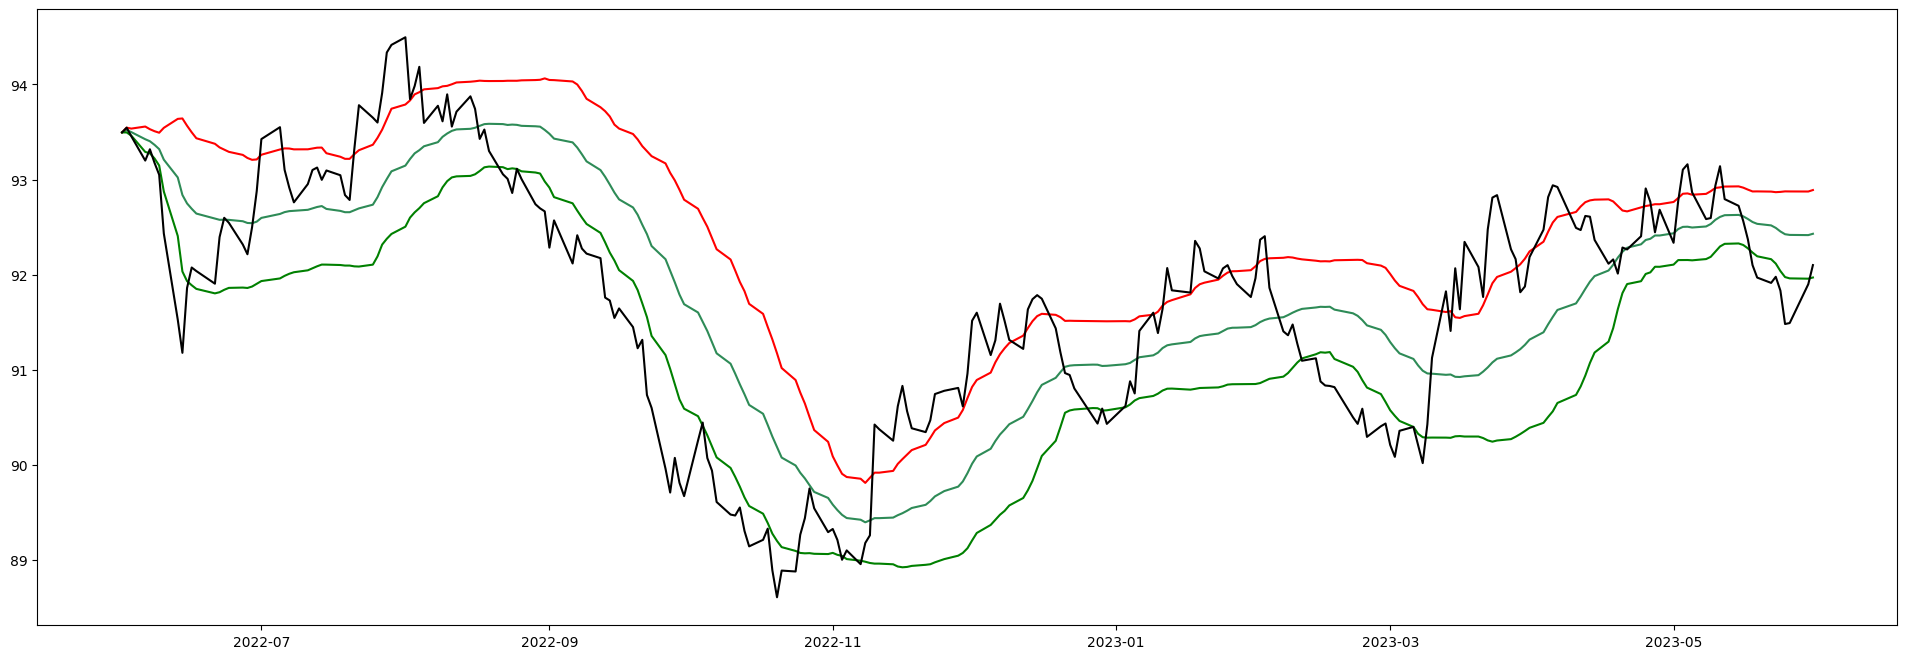

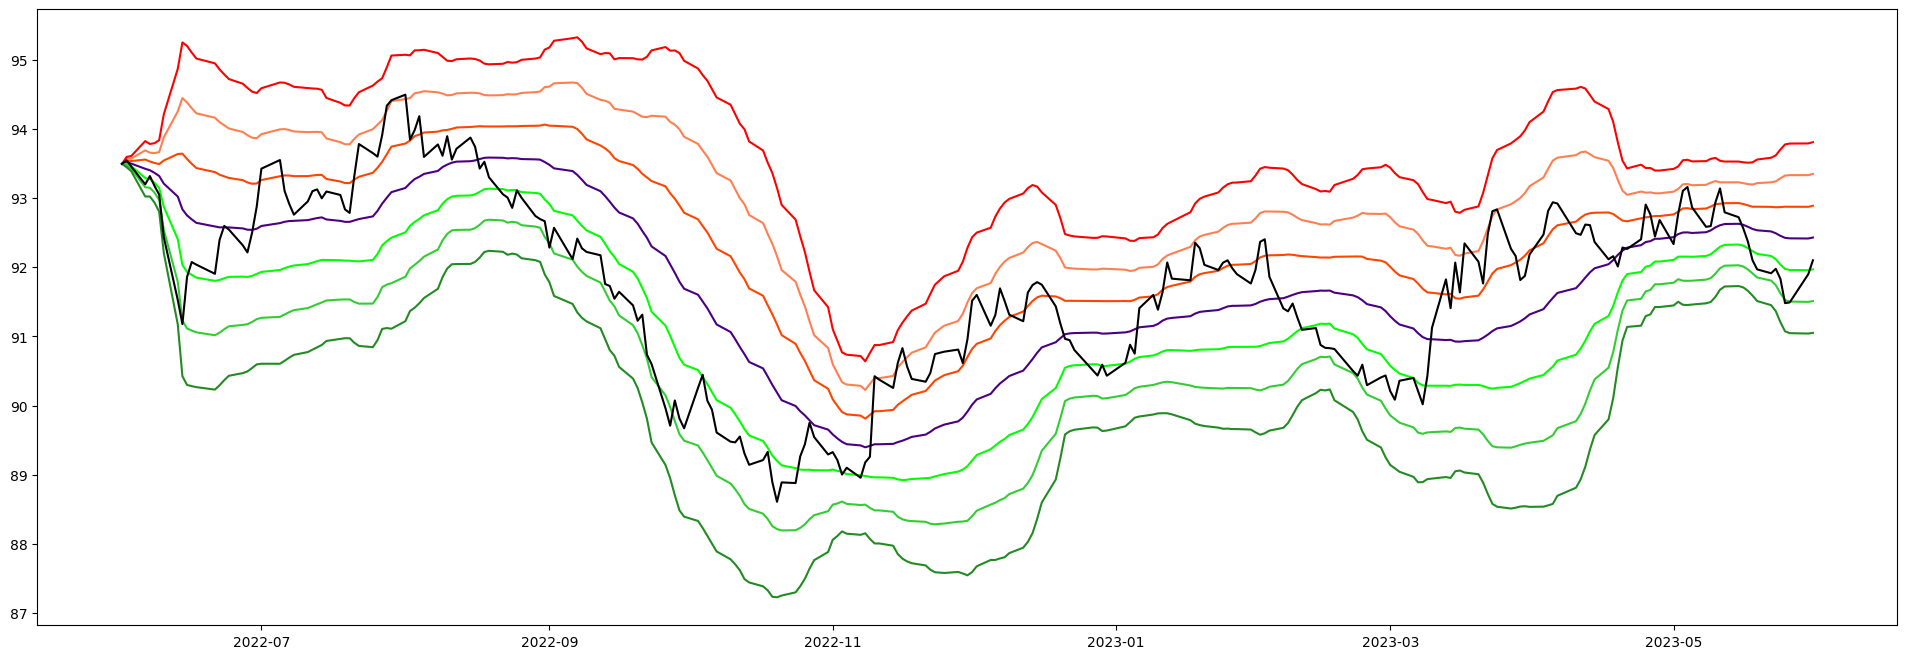

In [ ]:
import yfinance as yf

BTC_CLOSE = yf.download('BTC' , start = "2022-6-1" , end = "2023-6-1")['Close']
AAPl = yf.download('AAPL' , start = "2022-6-1" , end = "2023-6-1")['Close']


bollinger_band_version_1(BTC_CLOSE , 'BTC-Version-1')

bollinger_band_version_2(BTC_CLOSE , 'BTC-Version-2')


# bollinger_band_version_1(AAPl)

In [ ]:
stocks = ['BTC', 'DOT', 'BNB-USD', 'XRP-USD',
          'DOGE-USD', 'SOL-USD', 'MATIC-USD', 'DOT-USD', 'LTC-USD']

tickers_list = ['BTC' , 'AAPL', 'MSFT', 'AMZN' , 'NVDA' , 'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH']

for coin in tickers_list:
  stock = yf.download(coin , start = "2022-6-1" , end = "2023-6-1")['Close']

  bollinger_band_version_1(stock)

# johansen test

In [ ]:
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.tsatools import lagmat, add_trend
from statsmodels.tsa.adfvalues import mackinnonp

def adf(ts, maxlag=1):
    """
    Augmented Dickey-Fuller unit root test
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)

    # Get the dimension of the array
    nobs = ts.shape[0]

    # Calculate the discrete difference
    tsdiff = np.diff(ts)

    # Create a 2d array of lags, trim invalid observations on both sides
    tsdall = lagmat(tsdiff[:, None], maxlag, trim='both', original='in')
    # Get dimension of the array
    nobs = tsdall.shape[0]

    # replace 0 xdiff with level of x
    tsdall[:, 0] = ts[-nobs - 1:-1]
    tsdshort = tsdiff[-nobs:]


    # Calculate the linear regression using an ordinary least squares model
    results = OLS(tsdshort, add_trend(tsdall[:, :maxlag + 1], 'c')).fit()


    # print(results)
    adfstat = results.tvalues[0]

    # Get approx p-value from a precomputed table (from stattools)
    pvalue = mackinnonp(adfstat, 'c', N=1)
    # print(f'pvalue : {pvalue}')
    return pvalue

def cadf(x, y):
    """
    Returns the result of the Cointegrated Augmented Dickey-Fuller Test
    """
    # Calculate the linear regression between the two time series
    ols_result = OLS(x, y).fit()

    # Augmented Dickey-Fuller unit root test
    return adf(ols_result.resid)

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api


p_values_stocks = {}


def johansen_test_2_columns(data , column1 , column2):
    result = statsmodels.tsa.vector_ar.vecm.coint_johansen(data[[column1 , column2]],
                                                          det_order = 0  ,
                                                          k_ar_diff = 3)

    # print(f'result.max_eig_stat : {result.max_eig_stat}')

    h1 = result.max_eig_stat[0]
    h2 = result.max_eig_stat[1]


    new_stationary_seri = h1 * data[column1] + h2 * data[column2] #+ h3 * data[column3] + h4 * data[column4]

    p_value = adf(new_stationary_seri)

    key = column1 + ' , ' + column2
    filename = f' {h1} * {column1} + {h2} * {column2}'


    p_values_stocks[key] = p_value


    if p_value < 0.04 :
          print(f'-------------  pValue : {p_value}       ----- key : {key}')
          # bollinger_band_version_1(new_stationary_seri , key + '-version-1')
          # bollinger_band_version_2(new_stationary_seri , key + '-version-2')



In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api


p_values_stocks = {}

def johansen_test_3_columns(data , column1 , column2 , column3 ):
    result = statsmodels.tsa.vector_ar.vecm.coint_johansen(data[[column1 , column2 , column3 ]],
                                                          det_order = 0  ,
                                                          k_ar_diff = 3)

    # print(f'result.max_eig_stat : {result.max_eig_stat}')

    h1 = result.max_eig_stat[0]
    h2 = result.max_eig_stat[1]
    h3 = result.max_eig_stat[2]

    new_stationary_seri = h1 * data[column1] + h2 * data[column2] + h3 * data[column3]

    p_value = adf(new_stationary_seri)

    key = column1 + ' , ' + column2 + ' , ' + column3
    filename = f' {h1} * {column1} + {h2} * {column2} +  {h3} * {column3}'


    p_values_stocks[key] = p_value


    if p_value < 0.04 :
          print(f'-------------  pValue : {p_value}       ----- key : {key}')
          bollinger_band_version_1(new_stationary_seri , key + '-version-1')
          bollinger_band_version_2(new_stationary_seri , key + '-version-2')




In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api


p_values_stocks = {}


def johansen_test_4_columns(data , column1 , column2 , column3 , column4):
    result = statsmodels.tsa.vector_ar.vecm.coint_johansen(data[[column1 , column2 , column3 , column4]],
                                                          det_order = 0  ,
                                                          k_ar_diff = 3)

    # print(f'result.max_eig_stat : {result.max_eig_stat}')

    h1 = result.max_eig_stat[0]
    h2 = result.max_eig_stat[1]
    h3 = result.max_eig_stat[2]
    h4 = result.max_eig_stat[3]

    new_stationary_seri = h1 * data[column1] + h2 * data[column2] + h3 * data[column3] + h4 * data[column4]

    p_value = adf(new_stationary_seri)

    key = column1 + ' , ' + column2 + ' , ' + column3 + ',' + column4
    filename = f' {h1} * {column1} + {h2} * {column2} +  {h3} * {column3} + {h4} * {column4}'

    p_values_stocks[key] = p_value


    if p_value < 0.05 :
      print(f'-------------  pValue : {p_value}       ----- key : {key}')
      bollinger_band_version_1(new_stationary_seri , key + '-version-1')
      bollinger_band_version_2(new_stationary_seri , key + '-version-2')




In [ ]:
# Define the ticker list
# Fetch the data
import yfinance as yf
import pandas as pd
# import statsmodels.formula.api
import statsmodels.api

tickers_list = ['AAPL', 'MSFT', 'AMZN' , 'NVDA' ,
                'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH'
]


data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']

for column1 in tickers_list:
  for column2 in tickers_list:
    if column1 == column2 :
      continue

    johansen_test_2_columns(data , column1 , column2)


    for column3 in tickers_list:
      if column3 == column2 or column3 == column1:
        continue

      johansen_test_3_columns(data , column1 , column2 , column3)


      for column4 in tickers_list:
        if column4 == column3 or column4 == column2 or column4 == column1 :
          continue

        johansen_test_4_columns(data , column1 , column2 , column3 , column4)

[*********************100%***********************]  10 of 10 completed
-------------  pValue : 0.048150964100796924       ----- key : MSFT , XOM , UNH,TSLA
-------------  pValue : 0.04832814859608011       ----- key : MSFT , UNH , GOOGL,AMZN
-------------  pValue : 0.047042409162244066       ----- key : MSFT , UNH , GOOGL,XOM
-------------  pValue : 0.04774783696628018       ----- key : MSFT , UNH , GOOG,AMZN
-------------  pValue : 0.0477917515622935       ----- key : MSFT , UNH , GOOG,XOM
-------------  pValue : 0.03634701334385012       ----- key : MSFT , UNH , XOM,AMZN
-------------  pValue : 0.03641195066808338       ----- key : MSFT , UNH , XOM,GOOGL
-------------  pValue : 0.03737228739393394       ----- key : MSFT , UNH , XOM,GOOG
-------------  pValue : 0.041213013363929685       ----- key : MSFT , UNH , XOM,TSLA
-------------  pValue : 0.04348530304632178       ----- key : GOOGL , GOOG , XOM,UNH
-------------  pValue : 0.03608540545324682       ----- key : GOOGL , XOM , AMZN


[*********************100%***********************]  10 of 10 completed
-------------  pValue : 0.008172182933686462       ----- key : XOM , GOOGL , GOOG,UNH


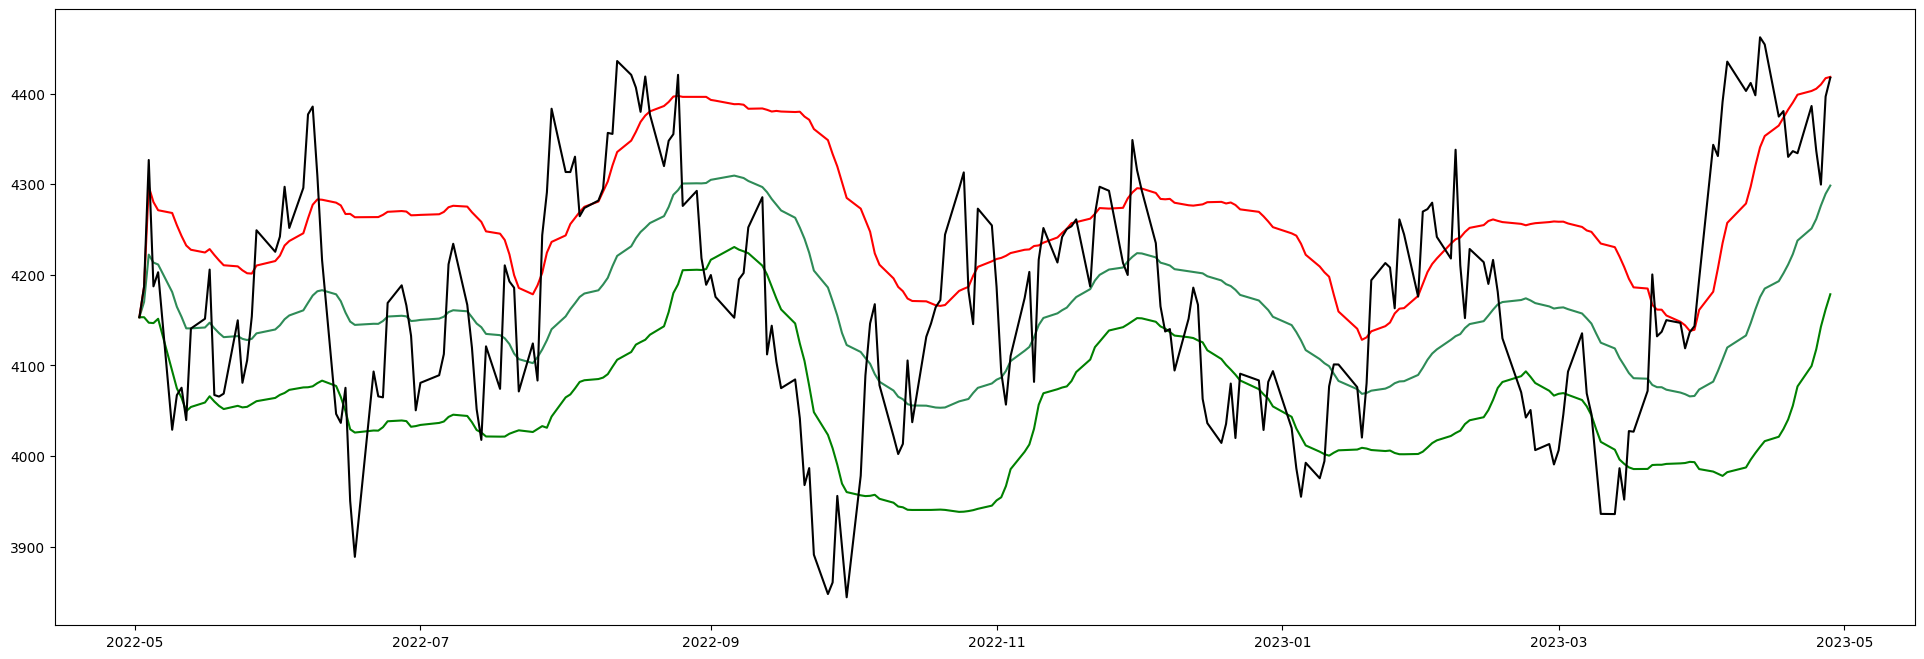

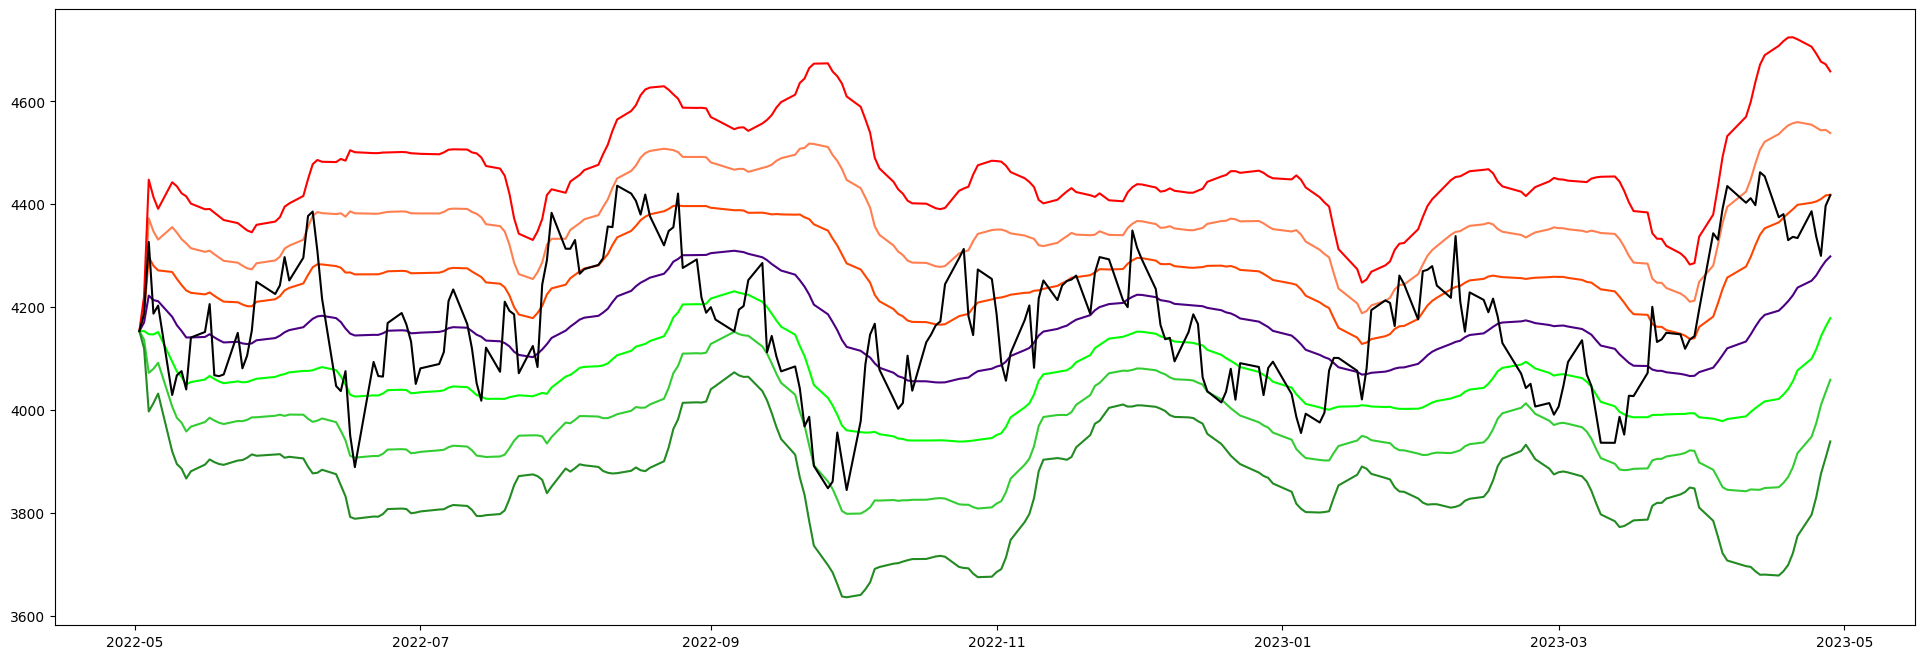

In [24]:
# Define the ticker list
# Fetch the data
import yfinance as yf
import pandas as pd
# import statsmodels.formula.api
import statsmodels.api

tickers_list = ['AAPL', 'MSFT', 'AMZN' , 'NVDA' ,
                'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH'
]


data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']

# johansen_test_3_columns(data , 'GOOG' , 'XOM' , 'UNH')
# johansen_test_4_columns(data , 'GOOGL' , 'XOM' , 'UNH' , 'MSFT')
johansen_test_4_columns(data , 'XOM' , 'GOOGL' , 'GOOG' , 'UNH')